<a href="https://colab.research.google.com/github/s64607231-droid/Liver-Chirrosis/blob/main/Copy_of_Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/liver_cirrhosis.csv.xlsx')

# Display the first 5 rows of the DataFrame
display(df.tail())

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2
24999,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [4]:
X = df.drop('Stage', axis=1)
y = df['Stage']


In [5]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_cols, numerical_cols


(Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'),
 Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
       dtype='object'))

In [6]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', LabelEncoder())  # applied column-wise later
])


In [7]:
X_encoded = X.copy()

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    le_dict[col] = le


In [8]:
num_imputer = SimpleImputer(strategy='median')
X_encoded[numerical_cols] = num_imputer.fit_transform(X_encoded[numerical_cols])

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [11]:
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5784
              precision    recall  f1-score   support

           1       0.57      0.59      0.58      1653
           2       0.51      0.47      0.49      1688
           3       0.64      0.67      0.66      1659

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000



In [12]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9196
              precision    recall  f1-score   support

           1       0.93      0.89      0.91      1653
           2       0.88      0.93      0.90      1688
           3       0.95      0.94      0.95      1659

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



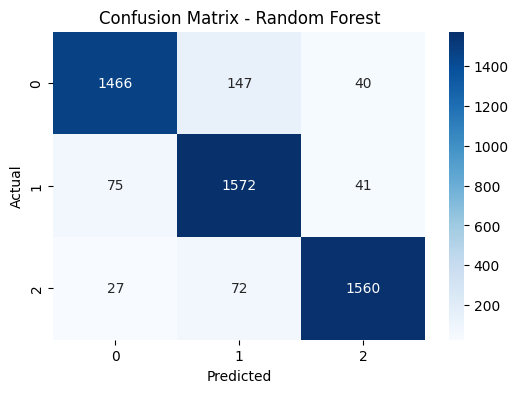

In [13]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


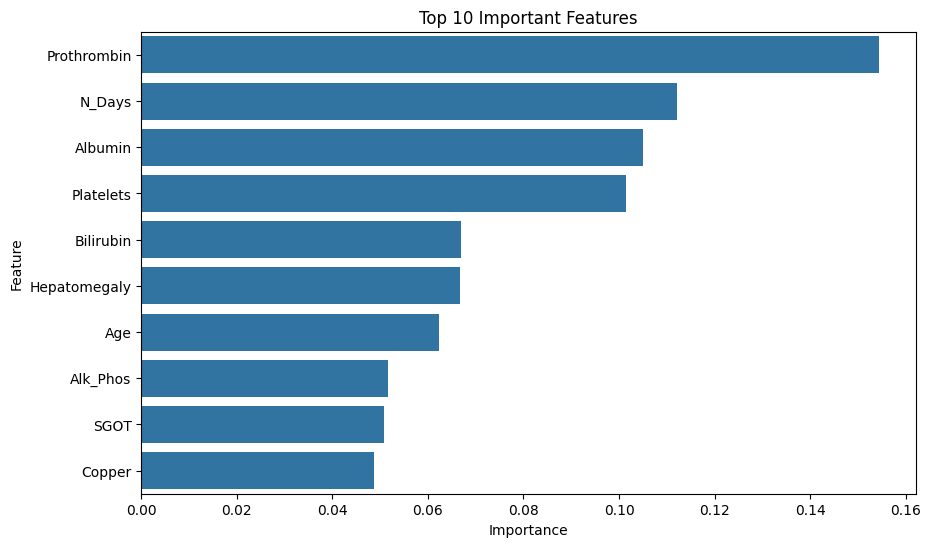

In [14]:
importances = rf.feature_importances_
features = X_encoded.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [15]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_encoded, y, cv=cv, scoring='accuracy')

print("CV Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


CV Accuracy Scores: [0.9168 0.9232 0.92   0.9172 0.9152]
Mean CV Accuracy: 0.91848


In [16]:
print("Final Model: Random Forest Classifier")
print("Task: Multi-class Liver Cirrhosis Stage Prediction")
print("Stages: 1 (Early), 2 (Intermediate), 3 (Advanced)")


Final Model: Random Forest Classifier
Task: Multi-class Liver Cirrhosis Stage Prediction
Stages: 1 (Early), 2 (Intermediate), 3 (Advanced)


In [17]:
def predict_liver_cirrhosis_stage(input_data):
    """
    input_data: dictionary of patient features
    returns: predicted stage and interpretation
    """

    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])

    # Encode categorical features
    for col, le in le_dict.items():
        input_df[col] = le.transform(input_df[col].astype(str))

    # Handle missing numerical values
    input_df[numerical_cols] = num_imputer.transform(input_df[numerical_cols])

    # Scale numerical features
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

    # Predict stage
    predicted_stage = rf.predict(input_df)[0]

    # Interpretation
    if predicted_stage == 0:
        interpretation = "Early / Mild Cirrhosis"
    elif predicted_stage == 1:
        interpretation = "Moderate Cirrhosis"
    else:
        interpretation = "Severe Cirrhosis"

    return predicted_stage, interpretation


In [18]:
patient_data = {
    'N_Days': 1368,
    'Status': 'C',
    'Drug': 'D-penicillamine',  # Changed 'placebo' to 'Placebo' to match training data
    'Age': 17664,
    'Sex': 'F',
    'Ascites': 'N',
    'Hepatomegaly': 'N',
    'Spiders': 'N',
    'Edema': 'N',
    'Bilirubin': 1.3,
    'Cholesterol': 369.5,
    'Albumin': 3.64,
    'Copper': 97.648,
    'Alk_Phos': 1982.65,
    'SGOT': 122.55,
    'Tryglicerides': 124.7021,
    'Platelets': 430,
    'Prothrombin': 10.6
}


In [19]:
stage, result = predict_liver_cirrhosis_stage(patient_data)

print("Predicted Stage:", stage)
print("Clinical Interpretation:", result)


Predicted Stage: 2
Clinical Interpretation: Severe Cirrhosis
